In [36]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [37]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data() # loading dataset 

In [38]:
len(x_train) # size of train data

60000

In [39]:
len(x_test)  # size of test data

10000

In [40]:
x_train[0].shape # shape of a single training example

(28, 28)

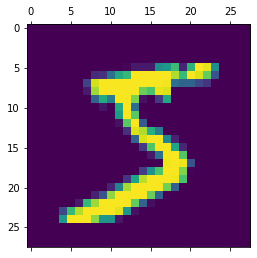

In [41]:
plt.matshow(x_train[0]) # visualization of 1st training example

In [42]:
y_train[0] # what is the output of 1st traning example 

5

In [43]:
y_train[:6] # first 6 output of traning example

array([5, 0, 4, 1, 9, 2], dtype=uint8)

In [44]:
x_train.shape # shape of whole training dataset 

(60000, 28, 28)

In [45]:
# scaling data for better accuracy 
x_train = x_train / 255 
x_test  = x_test / 255

In [46]:
x_train_flattened = x_train.reshape(len(x_train),28*28) # flattening the x_train to make it usable in DL model
x_test_flattened = x_test.reshape(len(x_test),28*28)   # flattening the x_test to make it usable in DL model

In [47]:
x_test_flattened.shape # showing the modified shape of x_test

(10000, 784)

In [48]:
x_train_flattened.shape # showing the modified shape of x_train

(60000, 784)

In [49]:
# creating a Deep Learning Model with Keras with only input layer and no hidden layer


# Create a `Sequential` model and add a Dense layer as the first layer.

model = keras.models.Sequential()
model.add(keras.Input(shape = (784,)))
model.add(keras.layers.Dense(10,activation = "sigmoid"))

# Now the model will take as input arrays of shape (None, 784)
# and output arrays of shape (None,10).

#after creating a model we need to compile it with necessary arguments

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4721 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9254


In [52]:
# let use add a hidden layer so that we can get e better accuracy 


# Create a `Sequential` model and add a Dense layer as the first layer and this time we add a hidden layer which has (None,10) shape.

model = keras.models.Sequential()
# model.add(keras.Input(shape = (784,))) if we can flattened our train dataset earlier
model.add(keras.Input(shape = (28,28)))
model.add(keras.layers.Flatten()) # if we didn't flattern our train dataset earlier then using this method we can flatten it
model.add(keras.layers.Dense(100,activation = "relu"))
model.add(keras.layers.Dense(10,activation = "sigmoid"))


# Now the model will take as input arrays of shape (None, 784)
# and output arrays of shape (None,10).

#after creating a model we need to compile it with necessary arguments

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# model.fit(x_train_flattened,y_train,epochs=5) # if we have flattend earlier 
model.fit(x_train,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2770 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1262 - accuracy: 0.9621
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0864 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0660 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0523 - accuracy: 0.9839


In [53]:
model.evaluate(x_test,y_test) # if you are using the Flatten() function provided by keras

# if you are flattening the train dataset earlier so your model is not using the flatten() method
# model.evaluate(x_test_flattened,y_test) 


313/313 [==============================] - 1s 4ms/step - loss: 0.0748 - accuracy: 0.9778


[0.07481581717729568, 0.9778000116348267]

In [54]:
y_prediction = model.predict(x_test) # predicting the whole test data
y_prediction[0] # showing the 0th prediction

313/313 [==============================] - 1s 2ms/step


array([3.4183193e-02, 3.7986778e-03, 3.4818786e-01, 8.8238591e-01,
       8.4784034e-07, 1.5125720e-02, 3.6207351e-10, 9.9997956e-01,
       5.2689321e-02, 2.2721575e-01], dtype=float32)

In [55]:
np.argmax(y_prediction[0]) # max possibility among 10 digits

7

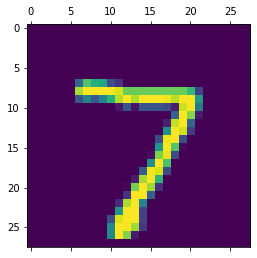

In [56]:
plt.matshow(x_test[0]); # showing the 0th test data

In [57]:
# for every prediction we need to know the highest similarity score because prediction is providing us with a array of size 10
y_prediction_labels = [np.argmax(i) for i in y_prediction]
y_prediction_labels[:5] # displaying first 5 prediction with highest similarity digit

[7, 2, 1, 0, 4]

In [58]:
# confusion matrix

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_prediction_labels )
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    0,    1,    0,    0,    3,    1,    3,    4],
       [   0, 1125,    4,    0,    0,    0,    2,    1,    3,    0],
       [   3,    1, 1014,    0,    2,    0,    2,    6,    4,    0],
       [   1,    0,   10,  976,    1,    2,    0,    7,    7,    6],
       [   2,    0,    3,    1,  957,    0,    3,    3,    2,   11],
       [   4,    1,    1,    7,    2,  859,    7,    2,    5,    4],
       [   5,    3,    4,    0,    2,    4,  938,    0,    2,    0],
       [   2,    3,    6,    0,    0,    0,    0, 1014,    1,    2],
       [   8,    0,    3,    5,    6,    2,    2,    3,  943,    2],
       [   1,    3,    0,    3,    9,    1,    1,    6,    1,  984]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

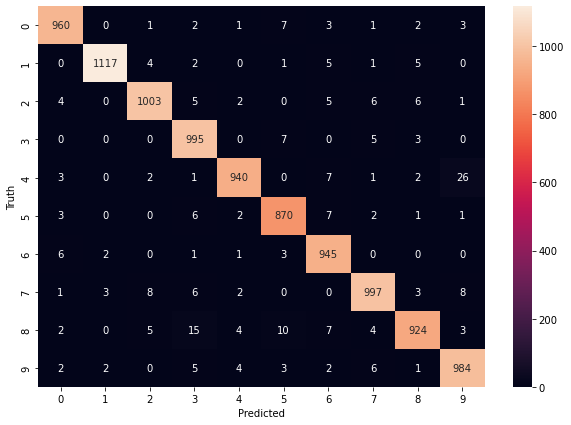

In [65]:
# visualizing the confusion matrix in a appealing way for this we need to import seaborn

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

